In [2]:
import numpy as np
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt

In [3]:
# pull up the polyfit variables and x, y positions

# p_fit = np.load('./dataFolder/3DpolyfitVariables.npy') #load the coefficients of the polyfit
# X_arr = pd.read_csv('./dataFolder/x_proboscis_ordered')
# X_arr = X_arr.drop(['Unnamed: 0'], axis=1)
# Y_arr = pd.read_csv('./dataFolder/y_proboscis_ordered')
# Y_arr = Y_arr.drop(['Unnamed: 0'], axis=1)
# tangent = pd.read_csv('./dataFolder/ProboscisVector.csv')


filepath = './dataFolder/TrackingData_2022_11_10/x_y_ordered_polyFit/'

p_fit_files = glob.glob(filepath + '*.npy')
X_arr_files = glob.glob(filepath + '*x*.csv')
Y_arr_files = glob.glob(filepath + '*y*.csv')

filepath_another = './dataFolder/TrackingData_2022_11_10/proboscisVector/'
prob_vect_files = glob.glob(filepath_another + '*ProboscisVector.csv')

filepath_yetanother = './dataFolder/TrackingData_2022_11_10/thresholded_bodyparts/'
trackPoints_files = glob.glob(filepath_yetanother + '*bodyparts.csv')

### compute error angle

In [16]:
out_path = './dataFolder/TrackingData_2022_11_10/ErrorAngle/'

for f in X_arr_files:
    X_arr = pd.read_csv(f, index_col=0)
    
    mothID = f.split('\\')[-1][:-24]
    Y_arr = pd.read_csv([file for file in Y_arr_files if mothID in file][0], index_col=0)
    p_fit = np.load([file for file in p_fit_files if mothID in file][0])
    
    trackPoints = pd.read_csv([file for file in trackPoints_files if mothID in file][0], index_col=0)
    tangent = pd.read_csv([file for file in prob_vect_files if mothID in file][0], index_col=0)
    
    # compute body axis
    body =  trackPoints.loc[:, ['body_x', 'body_y']].values
    prob_base = trackPoints.loc[:, ['prob_base_x', 'prob_base_y']].values
    BodyHeadVector = prob_base - body
    
    # compute proboscis vector
    ProbVector = pd.DataFrame()
    ProbVector['x'] = tangent.loc[:,'x2'] - tangent.loc[:,'x1']
    ProbVector['y'] = tangent.loc[:,'y2'] - tangent.loc[:,'y1']
    ProbVector = ProbVector.values
    
    angle = []
    for ii, pvec in enumerate(ProbVector):
        aa = np.arctan2(np.cross(pvec, BodyHeadVector[ii]), np.dot(pvec, BodyHeadVector[ii]))
        angle.append(aa)

    pd.Series(data = angle).to_csv(out_path + mothID + '_errorAngle.csv')

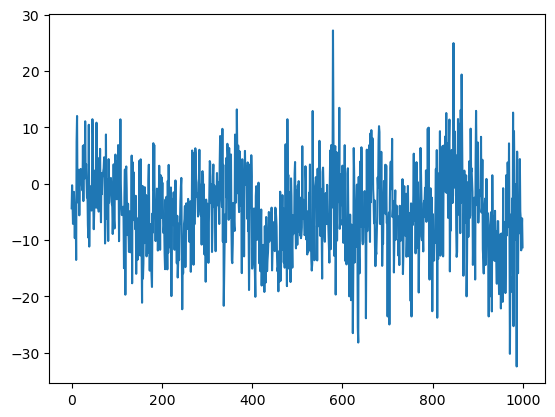

In [36]:
plt.plot(np.array(angle)*180/np.pi)